In [1]:
import itertools
import numpy as np
import math
import matplotlib.pyplot as plt

file = open('primes.txt', 'r')
primes = file.readlines()
for i in range(len(primes)):
    primes[i] = int(primes[i][:-1])
print("Last prime in primes.txt:", primes[-1], "Length of primes.txt:", len(primes))

Last prime in primes.txt: 2959213 Length of primes.txt: 214052


In [2]:
def toList(n): #takes in an int and returns it as a list of int's
    m = []
    for i in str(n): m.append(int(i))
    return m

def toNum(l): #takes in an list of int's and returns it as an int
    s = ''
    for i in l: s = s+str(i)
    return int(s)

def is_prime(n):
    #checks if number is prime
    #if false return first divisible number
    #fast
    if n%2 == 0 or n<2: return False
    for i in range(3,int(n/2),2):
        if n%i == 0: return False
    return True

#Taken from stackoverflow
def powerset(seq): 
    #Returns all the subsets of this set. This is a generator.
    if len(seq) <= 1:
        yield seq
        yield []
    else:
        for item in powerset(seq[1:]):
            yield [seq[0]]+item
            yield item
            
def clean(l): #Needs to have better name
    #input: list of ints
    #output: list of all powersets where lists are concatinated and duplicates are removed
    r = [x for x in powerset(l)]
    r.sort()
    r = r[1:] #removing the empty set
    r = list(r for r,_ in itertools.groupby(r)) #removing duplicates
    for i in range(len(r)):
        r[i] = toNum(r[i])
    r.remove(toNum(l))
    return r  

<Figure size 432x288 with 0 Axes>

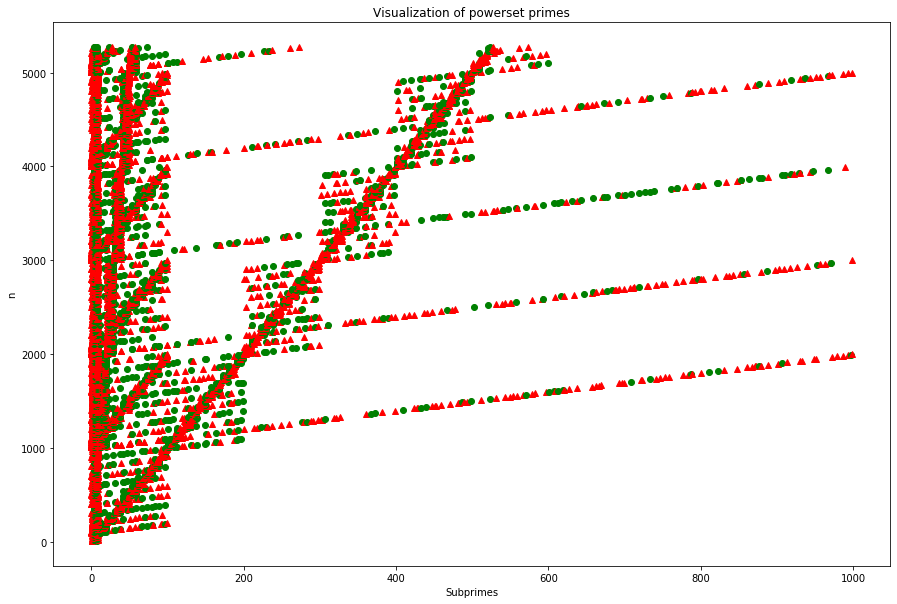

In [8]:
small_primes = primes[5:700] #taking the first 400 primes/removing primes < 10 - primes[5:700] gives good view
subprime = [] #list of all numbers in index's powerset
subprime_check = [] #1 if subprimes[i][j] is prime, 0 otherwise
for i in small_primes:
    temp = []
    subprime.append(clean(toList(i)))
    for j in clean(toList(i)):
        if is_prime(j): temp.append(1)
        else: temp.append(0)
    subprime_check.append(temp)

fig = plt.figure()  
plt.figure(figsize=(15, 10))
for i in range(len(small_primes)):
    for j in range(len(subprime[i])):
        if subprime_check[i][j] == 1: 
            plt.plot(subprime[i][j], small_primes[i], 'go')
        else: 
            plt.plot(subprime[i][j], small_primes[i], 'r^')
plt.xlabel('Subprimes')
plt.ylabel('n')
plt.title("Visualization of powerset primes")
plt.show()

<Figure size 432x288 with 0 Axes>

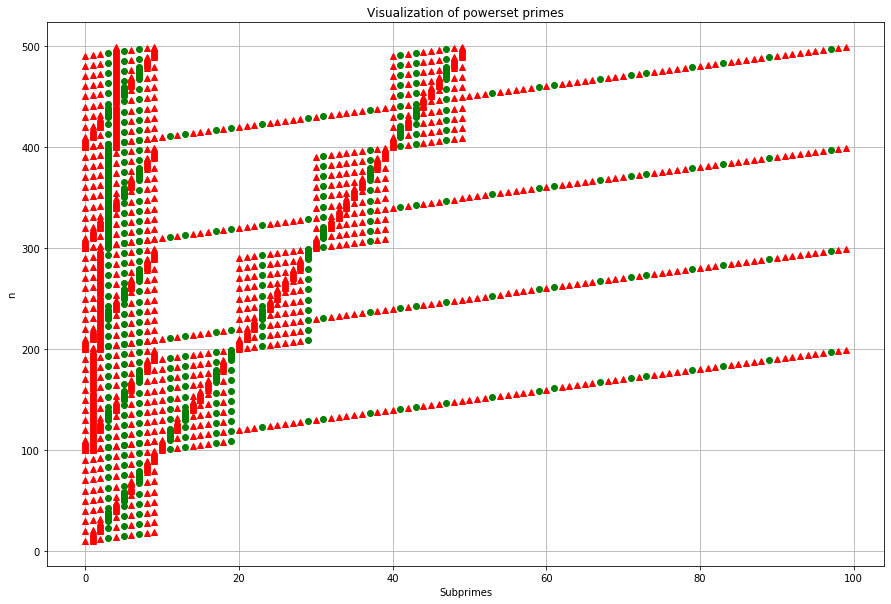

In [18]:
small_primes = range(10,500)
subprime = [] #list of all numbers in index's powerset
subprime_check = [] #1 if subprimes[i][j] is prime, 0 otherwise
for i in small_primes:
    temp = []
    subprime.append(clean(toList(i)))
    for j in clean(toList(i)):
        if is_prime(j): temp.append(1)
        else: temp.append(0)
    subprime_check.append(temp)

fig = plt.figure()  
plt.figure(figsize=(15, 10))
for i in range(len(small_primes)):
    for j in range(len(subprime[i])):
        if subprime_check[i][j] == 1: 
            plt.plot(subprime[i][j], small_primes[i], 'go')
        else: 
            plt.plot(subprime[i][j], small_primes[i], 'r^')
plt.xlabel('Subprimes')
plt.ylabel('n')
plt.title("Visualization of powerset primes")
plt.grid()
plt.show()

In [15]:
#example of graphed data

small_primes = range(10,50)#primes[5:50]
subprime = []
subprime_check = []
for i in small_primes:
    temp = []
    subprime.append(clean(toList(i)))
    for j in clean(toList(i)):
        if is_prime(j): temp.append(1)
        else: temp.append(0)
    subprime_check.append(temp)

for i in range(len(small_primes)):
    print("prime:",small_primes[i], "powerset", subprime[i], "subprime check",subprime_check[i])

prime: 10 powerset [0, 1] subprime check [0, 0]
prime: 11 powerset [1] subprime check [0]
prime: 12 powerset [1, 2] subprime check [0, 0]
prime: 13 powerset [1, 3] subprime check [0, 1]
prime: 14 powerset [1, 4] subprime check [0, 0]
prime: 15 powerset [1, 5] subprime check [0, 1]
prime: 16 powerset [1, 6] subprime check [0, 0]
prime: 17 powerset [1, 7] subprime check [0, 1]
prime: 18 powerset [1, 8] subprime check [0, 0]
prime: 19 powerset [1, 9] subprime check [0, 0]
prime: 20 powerset [0, 2] subprime check [0, 0]
prime: 21 powerset [1, 2] subprime check [0, 0]
prime: 22 powerset [2] subprime check [0]
prime: 23 powerset [2, 3] subprime check [0, 1]
prime: 24 powerset [2, 4] subprime check [0, 0]
prime: 25 powerset [2, 5] subprime check [0, 1]
prime: 26 powerset [2, 6] subprime check [0, 0]
prime: 27 powerset [2, 7] subprime check [0, 1]
prime: 28 powerset [2, 8] subprime check [0, 0]
prime: 29 powerset [2, 9] subprime check [0, 0]
prime: 30 powerset [0, 3] subprime check [0, 1]
prim

In [14]:
'''
Solved: Take n = abc, where n is a 3 digit number and abc are its respective digits
main box on the y axis: counting c
boxes that go up linearly: counting ac
lines that go up linearly through the hundreds: counting bc
.
.
.
all trends follow the permutations of abc
'''

'So this isnt a prime thing its in the way that the numbers are broken down and ordered'